In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma
 from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report````````````
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv("abalone_dataset.csv")

In [74]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [75]:
print(df.shape)

(4177, 9)


In [76]:
df.rename(columns={ "Rings":"Age"}, inplace = True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [77]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [78]:
df[df['Height'] == 0] 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [79]:
means=pd.pivot_table(df,index=['Sex'],aggfunc={'Height':np.mean})
means

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


In [80]:
df['Height']=df['Height'].replace(to_replace=0,value=0.0107996)

In [81]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139522,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041810,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [82]:
print("Value Count of Age Column")
print(df.Age.value_counts())

Value Count of Age Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Age, dtype: int64


<AxesSubplot: xlabel='Sex', ylabel='count'>

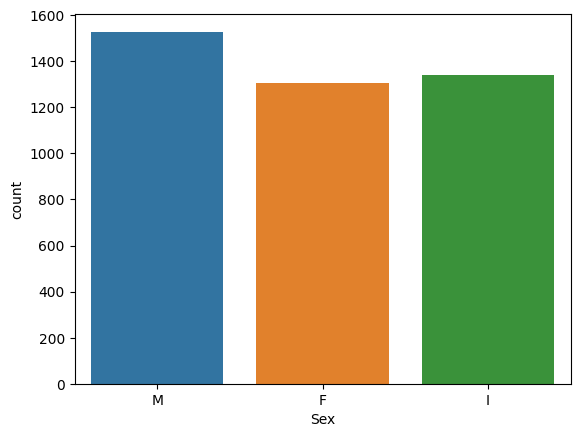

In [83]:
sns.countplot(x='Sex', data = df)

<AxesSubplot: xlabel='Sex', ylabel='Age'>

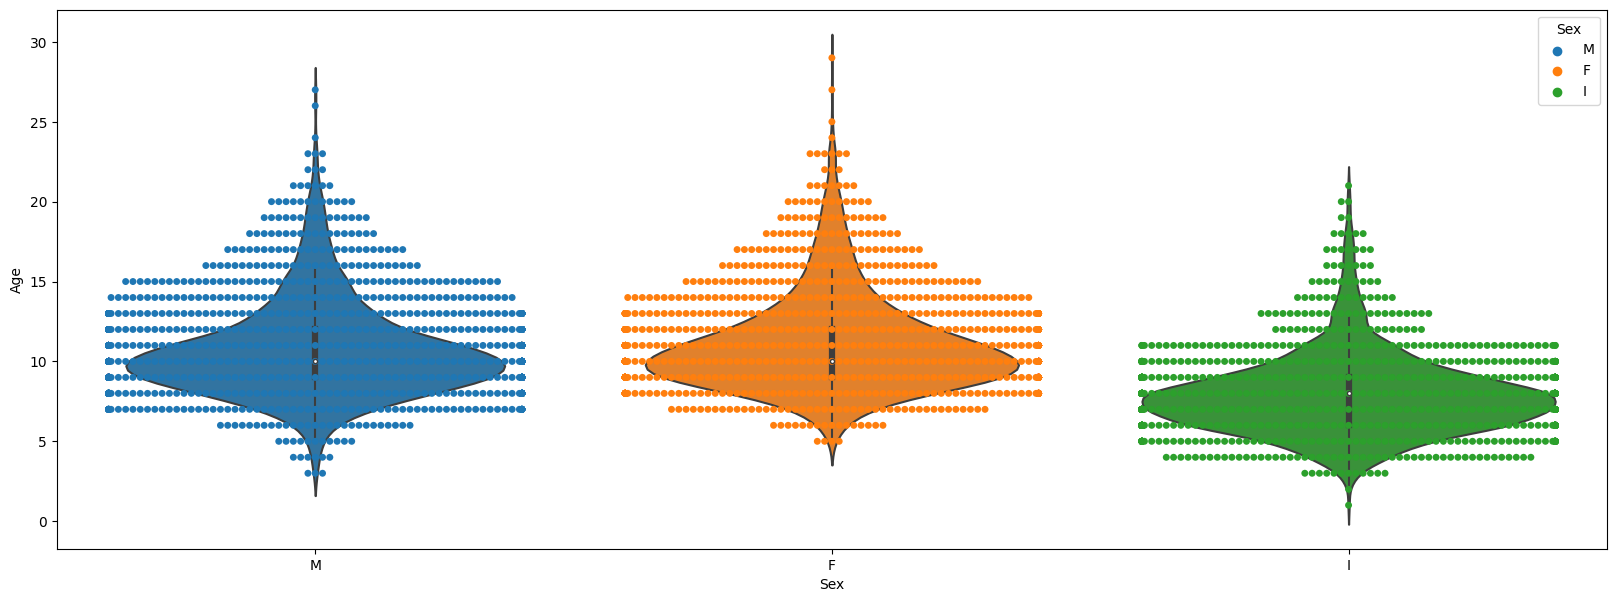

In [21]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df)

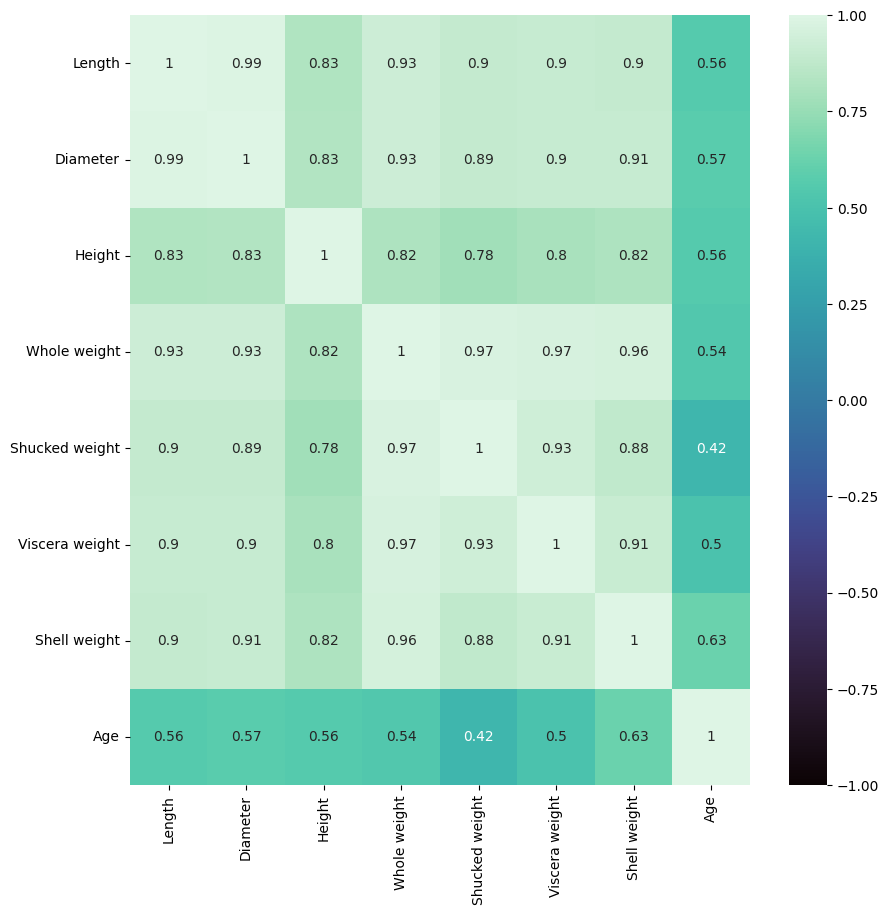

In [22]:
corr = df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True, cmap = 'mako')

array([[<AxesSubplot: title={'center': 'Length'}>,
        <AxesSubplot: title={'center': 'Diameter'}>,
        <AxesSubplot: title={'center': 'Height'}>,
        <AxesSubplot: title={'center': 'Whole weight'}>],
       [<AxesSubplot: title={'center': 'Shucked weight'}>,
        <AxesSubplot: title={'center': 'Viscera weight'}>,
        <AxesSubplot: title={'center': 'Shell weight'}>,
        <AxesSubplot: title={'center': 'Age'}>]], dtype=object)

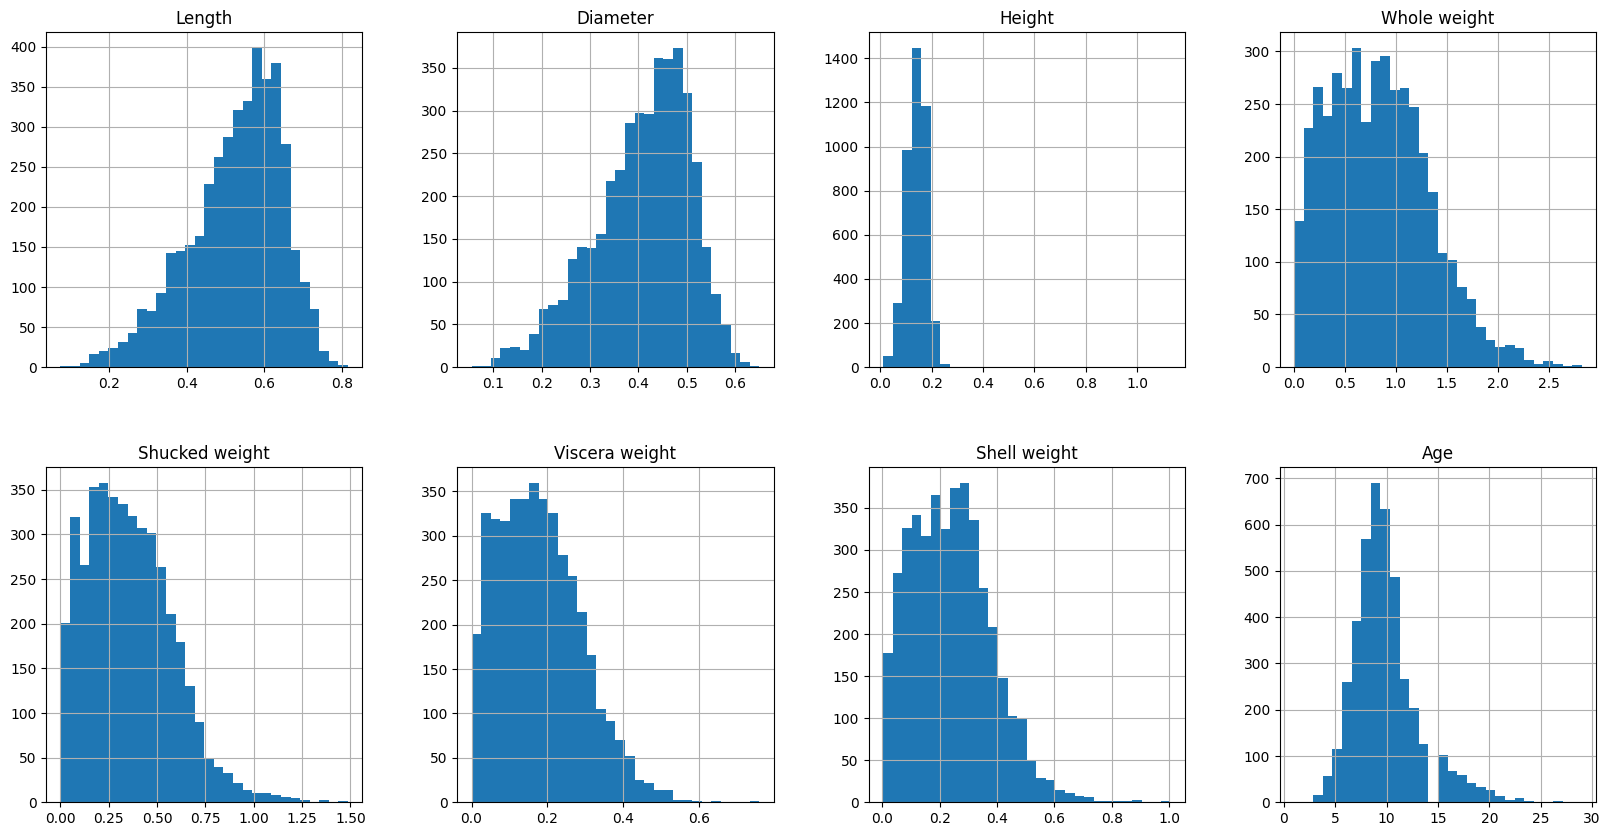

In [26]:
df.hist(figsize = (20,10), layout = (2,4), bins = 30)

In [84]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.96)] #highly correlated variables to be removed.

print("Columns to drop:\n", columns_to_drop)

Columns to drop:
 ['Diameter', 'Shucked weight', 'Viscera weight']


In [85]:
df.drop(columns_to_drop, axis=1, inplace = True)

In [86]:
df.head()

,Sex,Length,Height,Whole weight,Shell weight,Age
0,M,0.455,0.095,0.5140,0.150,15
1,M,0.350,0.090,0.2255,0.070,7
2,F,0.530,0.135,0.6770,0.210,9
3,M,0.440,0.125,0.5160,0.155,10
4,I,0.330,0.080,0.2050,0.055,7


In [ ]:
df.head()

In [88]:
#calculating VIF
def vif_arr(df1):
    vif = pd.DataFrame()
    df1 = sma.add_constant(df1)
    vif["Features"] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    return(vif)

In [89]:
temp = df.drop('Sex', axis = 1) #i.e. categorical
vif_arr(temp).sort_values(by = 'Features', ascending = False)

,Features,VIF
0,const,62.574349
3,Whole weight,17.229603
4,Shell weight,14.520663
1,Length,7.839668
2,Height,3.562343
5,Age,1.833132


Text(0.5, 1.0, 'height vs sex')

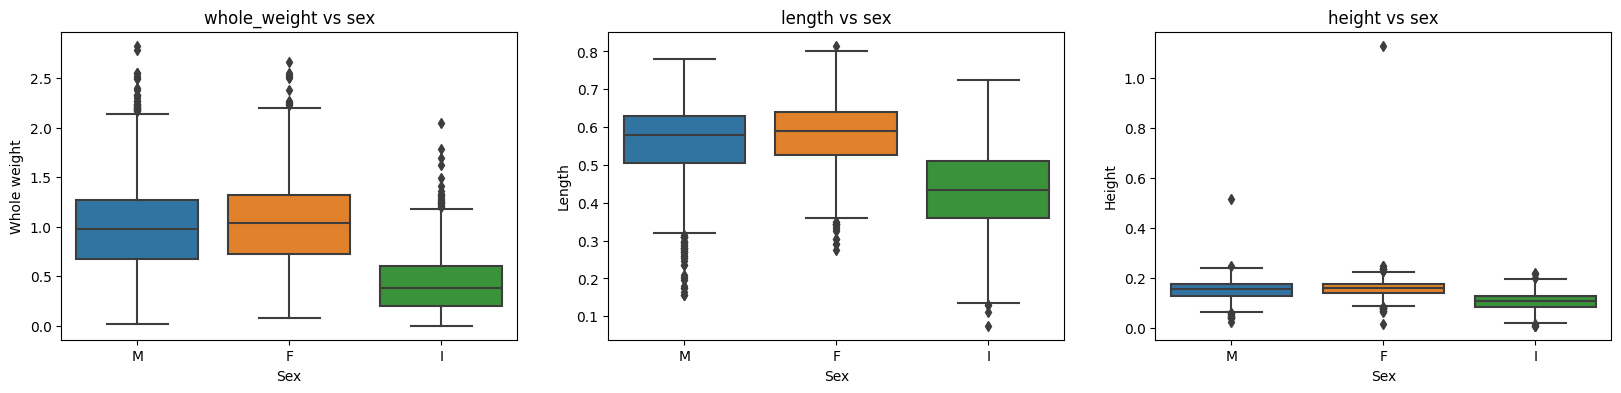

In [90]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'Sex', y = 'Whole weight', data = df, ax = axes[0])
axes[0].set_title('whole_weight vs sex')

sns.boxplot(x = 'Sex', y = 'Length', data = df, ax = axes[1])
axes[1].set_title('length vs sex')

sns.boxplot(x = 'Sex', y = 'Height', data = df, ax = axes[2])
axes[2].set_title('height vs sex')

In [91]:
df['Height'] = np.sqrt(df['Height'])

In [92]:
df.skew().sort_values(ascending = False)

Age             1.114102
Shell weight    0.620927
Whole weight    0.530959
Height         -0.217076
Length         -0.639873
dtype: float64

Text(0.5, 1.0, 'height vs sex')

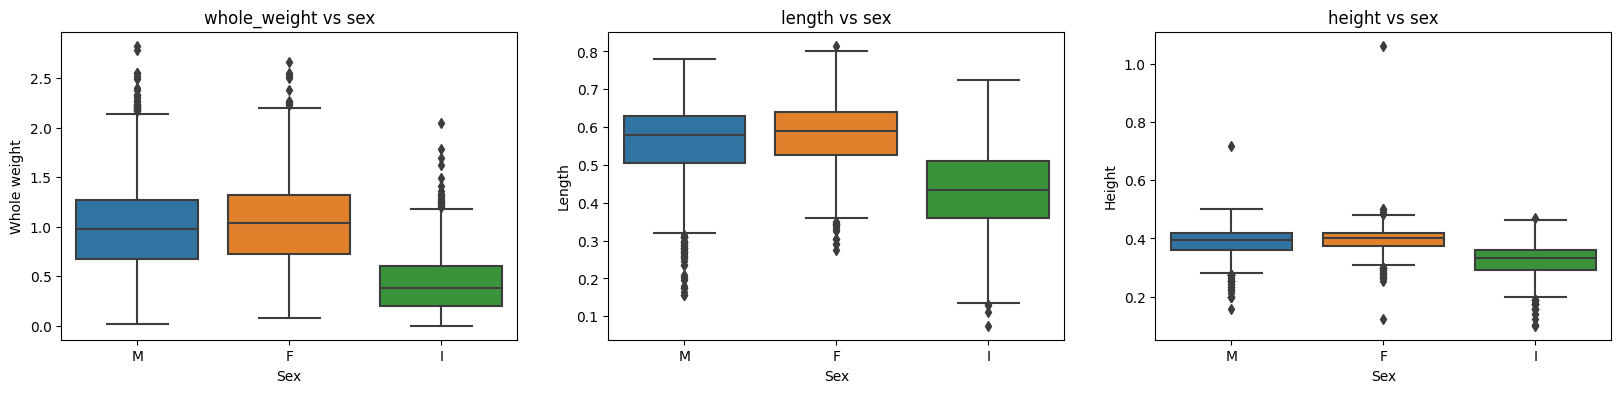

In [86]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'Sex', y = 'Whole weight', data = df, ax = axes[0])
axes[0].set_title('whole_weight vs sex')

sns.boxplot(x = 'Sex', y = 'Length', data = df, ax = axes[1])
axes[1].set_title('length vs sex')

sns.boxplot(x = 'Sex', y = 'Height', data = df, ax = axes[2])
axes[2].set_title('height vs sex')

In [93]:
Age = []
for i in df["Age"]:
    if i <= 7:
        Age.append(1)
    elif i > 7 and i <= 15 :
        Age.append(2)
    else:
        Age.append(3)
df["Age"] = Age
#df_1.drop("age" , axis =1,inplace=True)
df.head()

,Sex,Length,Height,Whole weight,Shell weight,Age
0,M,0.455,0.308221,0.5140,0.150,2
1,M,0.350,0.300000,0.2255,0.070,1
2,F,0.530,0.367423,0.6770,0.210,2
3,M,0.440,0.353553,0.5160,0.155,2
4,I,0.330,0.282843,0.2050,0.055,1


In [94]:
pd.DataFrame(df).to_csv('org.csv',index=False)

In [95]:
df=pd.get_dummies(df)

In [96]:
df.head()

,Length,Height,Whole weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.308221,0.5140,0.150,2,0,0,1
1,0.350,0.300000,0.2255,0.070,1,0,0,1
2,0.530,0.367423,0.6770,0.210,2,1,0,0
3,0.440,0.353553,0.5160,0.155,2,0,0,1
4,0.330,0.282843,0.2050,0.055,1,0,1,0


In [97]:
df['Age'].value_counts()

2    3077
1     839
3     261
Name: Age, dtype: int64

In [98]:
#NEW VIF
vif_arr(df).sort_values(by = 'Features', ascending = False)

,Features,VIF
0,const,0.000000
3,Whole weight,17.148327
4,Shell weight,13.077623
8,Sex_M,inf
7,Sex_I,inf
6,Sex_F,inf
1,Length,9.761182
2,Height,5.173524
5,Age,1.843298


In [99]:
X = df.drop(['Age'], axis = 1)
y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Use if you want to normalize data
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)
#X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
#X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

#X_train = X_train_std.values
#X_test = X_test_std.values

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

In [100]:
classifiers = {"LogisiticRegression": LogisticRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier(),
               "RandomForestClassifier" : RandomForestClassifier()}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 84.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 83.0 % accuracy score
Classifiers:  SVC Has a training score of 84.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 78.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 83.0 % accuracy score


In [101]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.69      0.76       180
           2       0.84      0.95      0.89       602
           3       0.27      0.06      0.09        54

    accuracy                           0.83       836
   macro avg       0.65      0.56      0.58       836
weighted avg       0.80      0.83      0.81       836

[[124  56   0]
 [ 24 570   8]
 [  0  51   3]]


In [ ]:
df

In [310]:
import pickle
pickle.dump(model, open('randomForestOrg2.pkl', 'wb'))

In [33]:
from sklearn.metrics import mean_absolute_error as mae
  
# list of integers of actual and calculated
actual = [2, 3, 5, 5, 9]
calculated = [3, 3, 8, 7, 6]
  
# calculate MAE
error = mae(actual, calculated)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 1.8


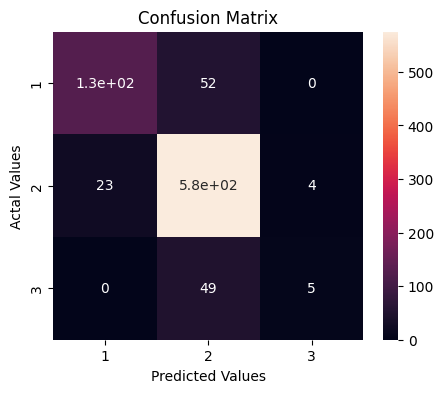

In [169]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix
mse = mean_squared_error(y_train, y_pred)
print(mse)

ValueError: Found input variables with inconsistent numbers of samples: [3341, 836]

In [45]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install scikit-learn==0.21.2

     ---------------------------------------- 12.2/12.2 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
  Running setup.py install for scikit-learn: started
  Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\administrator\appdata\local\programs\python\python311\lib\site-packages\scikit_learn-1.2.1.dist-info\
   from C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\~cikit_learn-1.2.1.dist-info
  Moving to c:\users\administrator\appdata\local\programs\python\python311\lib\site-packages\sklearn\
   from C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\~-learn
Note: you may need to restart the 

  DEPRECATION: scikit-learn is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  Running setup.py install for scikit-learn did not run successfully.
  exit code: 1
  
  [139 lines of output]
  Partial import of sklearn during the build process.
  C:\Users\Administrator\AppData\Local\Temp\pip-install-p_a32p3f\scikit-learn_2d7e6c037a73431c92f732ee342dc455\setup.py:122: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For mo

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(X_train, y_train)

ValueError: y_true and y_pred have different number of output (7!=1)

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred,squared=False)

0.4033353763771789

In [47]:
import math
import os
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
#Mean Absolute Error 

mae=mean_absolute_error(y_test,y_pred);
print("MAE:"+str(mae))
#RMSE 
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:"+str(rmse))
#Median Absolute error


MAE:0.16028708133971292
RMSE:0.4033353763771789


In [277]:
pd.DataFrame(df).to_csv('Accurancy.csv',index=False)

In [38]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

NameError: name 'clf' is not defined

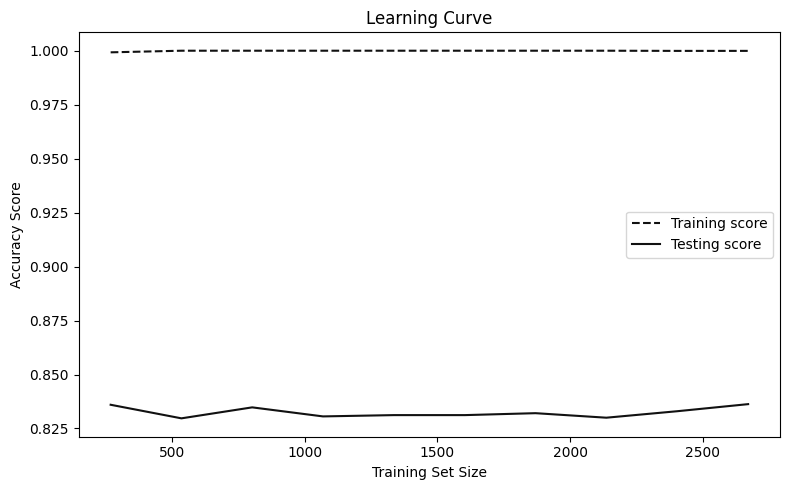

In [102]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
rf = make_pipeline(SimpleImputer(), StandardScaler(), RandomForestClassifier(random_state=42)) 
def plot_learning_curves(estimator, X, y, cv):

                    train_sizes, train_scores, test_scores = learning_curve(
                        estimator=estimator,
                        X=X_train,
                        y=y_train,
                        train_sizes=np.linspace(0.1, 1.0, 10),
                        cv=5,
                        scoring="accuracy",
                        random_state=42
                    )
                    train_mean = np.mean(train_scores, axis=1)
                    test_mean = np.mean(test_scores, axis=1)

                    plt.subplots(figsize=(8,5))
                    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
                    plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")
                    plt.title("Learning Curve")
                    plt.xlabel("Training Set Size")
                    plt.ylabel("Accuracy Score")
                    plt.legend(loc="best")
                    plt.tight_layout()
                    plt.show()
                    
plot_learning_curves(rf, X_train, y_train, cv=5)

In [40]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [836, 3341]

In [68]:
# Load the packages
import numpy as np
import pandas as pd

 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import datasets
 
 
# Create training / test split; Note the stratification
#
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Perform feature scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# Fit / train the model
prcptrn = Perceptron(eta0=0.1, random_state=1)
prcptrn.fit(X_train_std, Y_train)
 
# Check the accuracy of the model
Y_predict_std = prcptrn.predict(X_test_std)
print("Accuracy Score %.3f" % accuracy_score(Y_test, Y_predict_std))

Accuracy Score 0.809


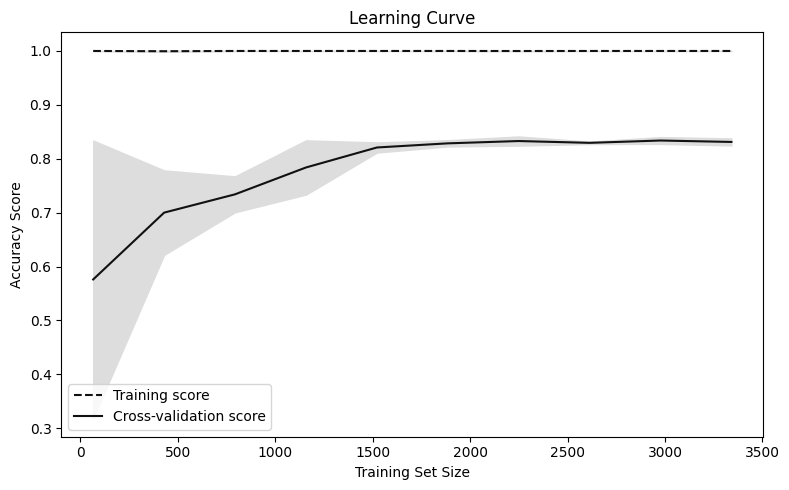

In [115]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=5, scoring='accuracy',random_state=42, n_jobs=-1, train_sizes=np.linspace(0.02, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(8,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()